<a href="https://colab.research.google.com/github/szh141/UVA-AMF/blob/main/simulate_camera_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://petebankhead.gitbooks.io/imagej-intro/content/chapters/macro_simulating/macro_simulating.html

uint8
float32
readNoise is  5.01243510565271


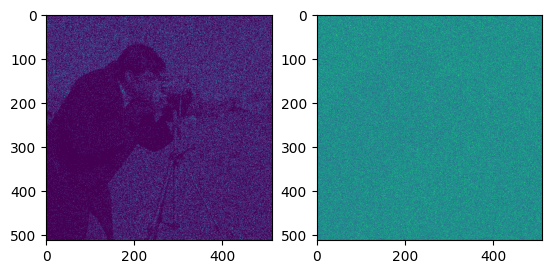

In [17]:
# Simulate photon noise and readout noise

from skimage import data,img_as_float32
import numpy as np
from matplotlib import pyplot as plt

a1 = data.camera()
print(a1.dtype)
#a2 = np.array(a1, dtype='f')
a2=img_as_float32(a1)
print(a2.dtype)

fig,ax=plt.subplots(1,2)
poissonNoise = np.random.poisson(a2)
ax[0].imshow(poissonNoise)

readNoise = np.random.normal(a2,5)
ax[1].imshow(readNoise)

print('readNoise is ',np.std(readNoise))

5.009780638927372

<class 'numpy.ndarray'>
uint8
float32


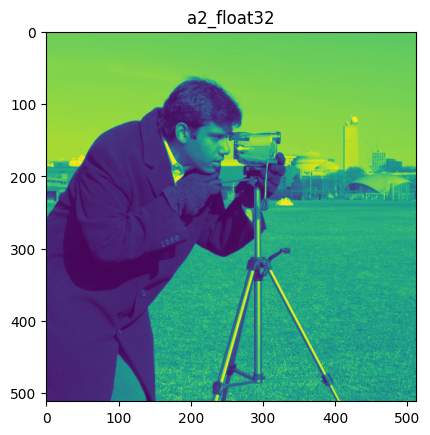

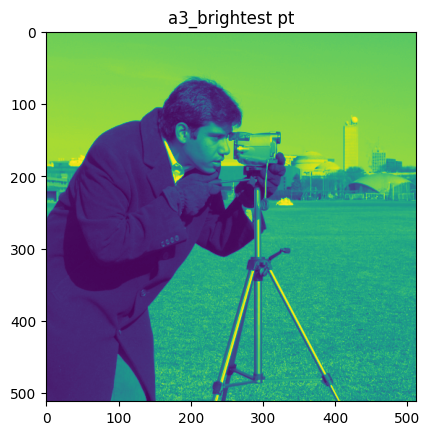

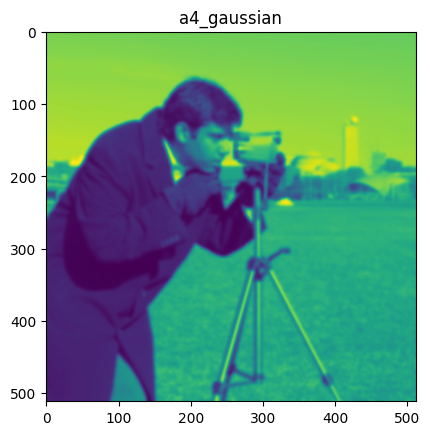

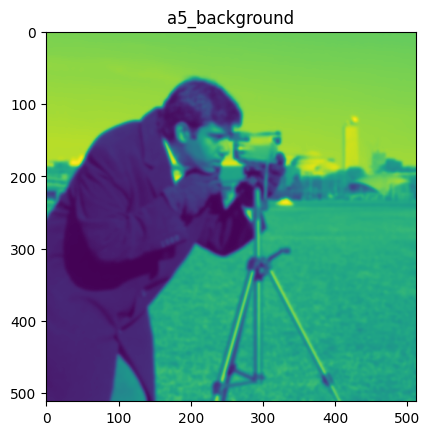

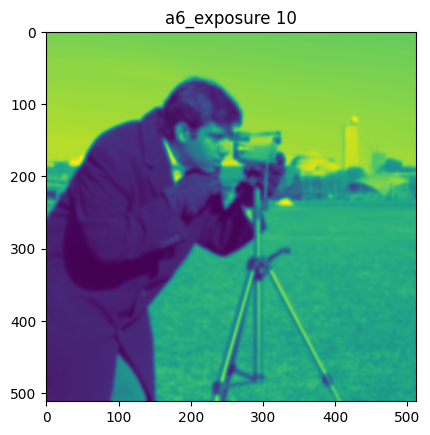

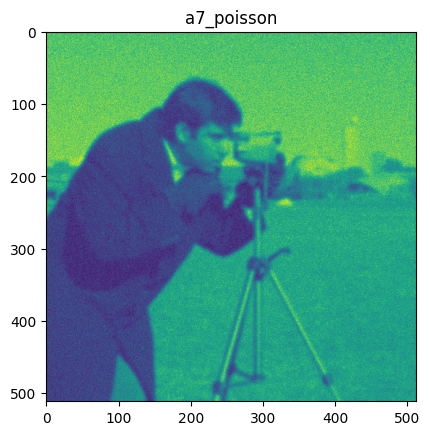

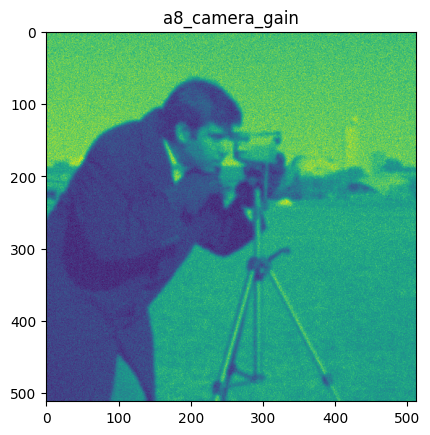

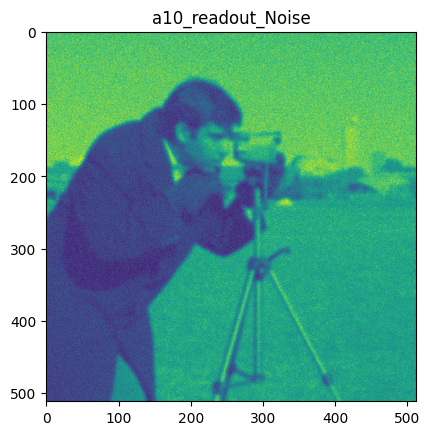

'\n# Clip any negative values\na10[a10<0]=0\n\n# Clip the maximum values based on the bit-depth\nmaxVal = pow(2, nBits) - 1;\na10[a10>maxVal] = maxVal\n\nplt.imshow(a10)\n\n// Get the image dimensions\nwidth = getWidth();\nheight = getHeight();\n\n// Round the pixels to integer values\nfor (y = 0; y < height; y++) {\n    // Loop through all the columns of pixels\n    for (x = 0; x < width; x++) {\n        // Extract the pixel value at coordinate (x, y)\n        value = getPixel(x, y);\n        // Round the pixel value to the nearest integer\n        value = round(value);\n        // Replace the pixel value in the image\n        setPixel(x, y, value);\n    }\n}\n\n\nplt.imshow(a10)\n'

In [23]:
from skimage import data,img_as_float32
import numpy as np
from matplotlib import pyplot as plt

# variable
psfSigma = 2
backgroundPhotons = 10
exposureTime = 10
readStdDev = 5
detectorGain = 1
detectorOffset = 100
nBits = 8
maxPhotonEmission = 10
#doBinning = false

# 32-bit data
# Normalize the image to the range 0-1, float32

a1 = data.camera()
print(type(a1))
print(a1.dtype)
a2 = img_as_float32(a1)
print(a2.dtype)

plt.imshow(a2)
plt.title('a2_float32')
plt.show()

# Define the photon emission at the brightest point
# so that it's not dominated by noise

a3 = a2*maxPhotonEmission

plt.imshow(a3)
plt.title('a3_brightest pt')
plt.show()

# Simulate PSF blurring
from skimage import filters
a4 = filters.gaussian(a3,psfSigma)

plt.imshow(a4)
plt.title('a4_gaussian')
plt.show()

#Add background photons
a5 = a4 + backgroundPhotons

plt.imshow(a5)
plt.title('a5_background')
plt.show()

# Multiply by the exposure time
a6 = a5*exposureTime
plt.imshow(a6)
plt.title('a6_exposure 10')
plt.show()

# Simulate photon noise
a7 = a6+ np.random.poisson(a6)
plt.imshow(a7)
plt.title('a7_poisson')
plt.show()

# Simulate the detector gain
# (note this should really add Poisson noise too!)
a8 = a7*detectorGain
plt.imshow(a8)
plt.title('a8_camera_gain')
plt.show()

"""
// Simulate binning (optional)
if (doBinning) {
  run("Bin...", "x=2 y=2 bin=Sum");
}
"""

# Simulate the detector offset
a9 = a8 + detectorOffset

# Simulate read noise
a10 = a9 + np.random.normal(a9,readStdDev)
#run("Add Specified Noise...", "standard="+readStdDev);
plt.imshow(a10)
plt.title('a10_readout_Noise')
plt.show()

"""
# Clip any negative values
# a10.min() already more than 255 ...

a10[a10<0]=0

# Clip the maximum values based on the bit-depth
maxVal = pow(2, nBits) - 1;
a10[a10>maxVal] = maxVal

plt.imshow(a10)

// Get the image dimensions
width = getWidth();
height = getHeight();

// Round the pixels to integer values
for (y = 0; y < height; y++) {
    // Loop through all the columns of pixels
    for (x = 0; x < width; x++) {
        // Extract the pixel value at coordinate (x, y)
        value = getPixel(x, y);
        // Round the pixel value to the nearest integer
        value = round(value);
        // Replace the pixel value in the image
        setPixel(x, y, value);
    }
}


plt.imshow(a10)
"""

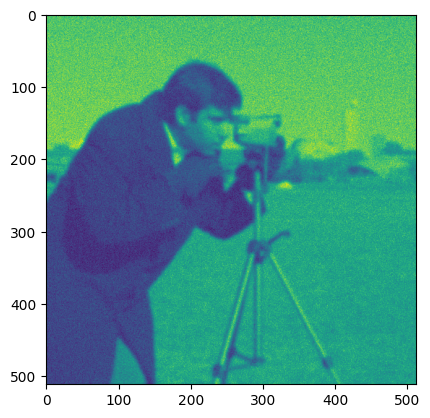

In [26]:
a11 = img_as_float32(a10)
plt.imshow(a11)